# Name: Mitul Nakrani

# Heart failure Detection Using Machine Learning and Neural Networks

# 1. import library

In [126]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

#default theme
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

# 2. data analysis

In [127]:
train = pd.read_csv('heart_failure_clinical_records_dataset.csv')
train.head(6)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


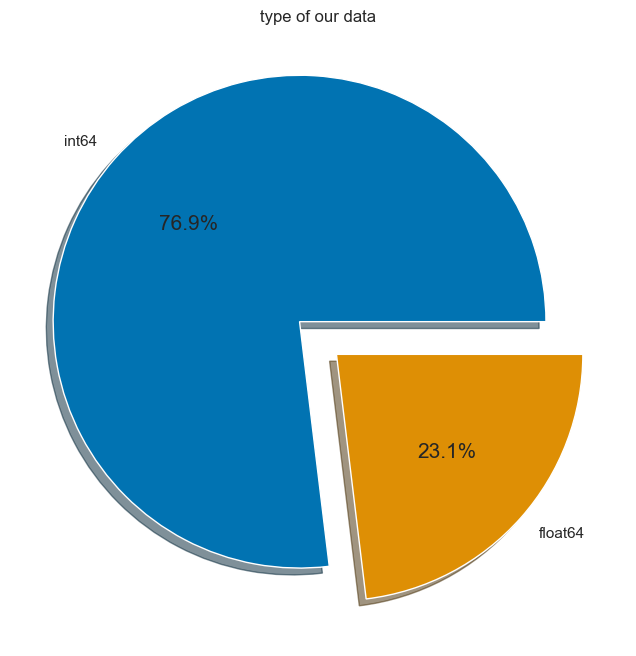

In [129]:

train.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('type of our data');

In [130]:
train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [131]:
train.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# 3. finding missing values

In [132]:
train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# 4. visualization

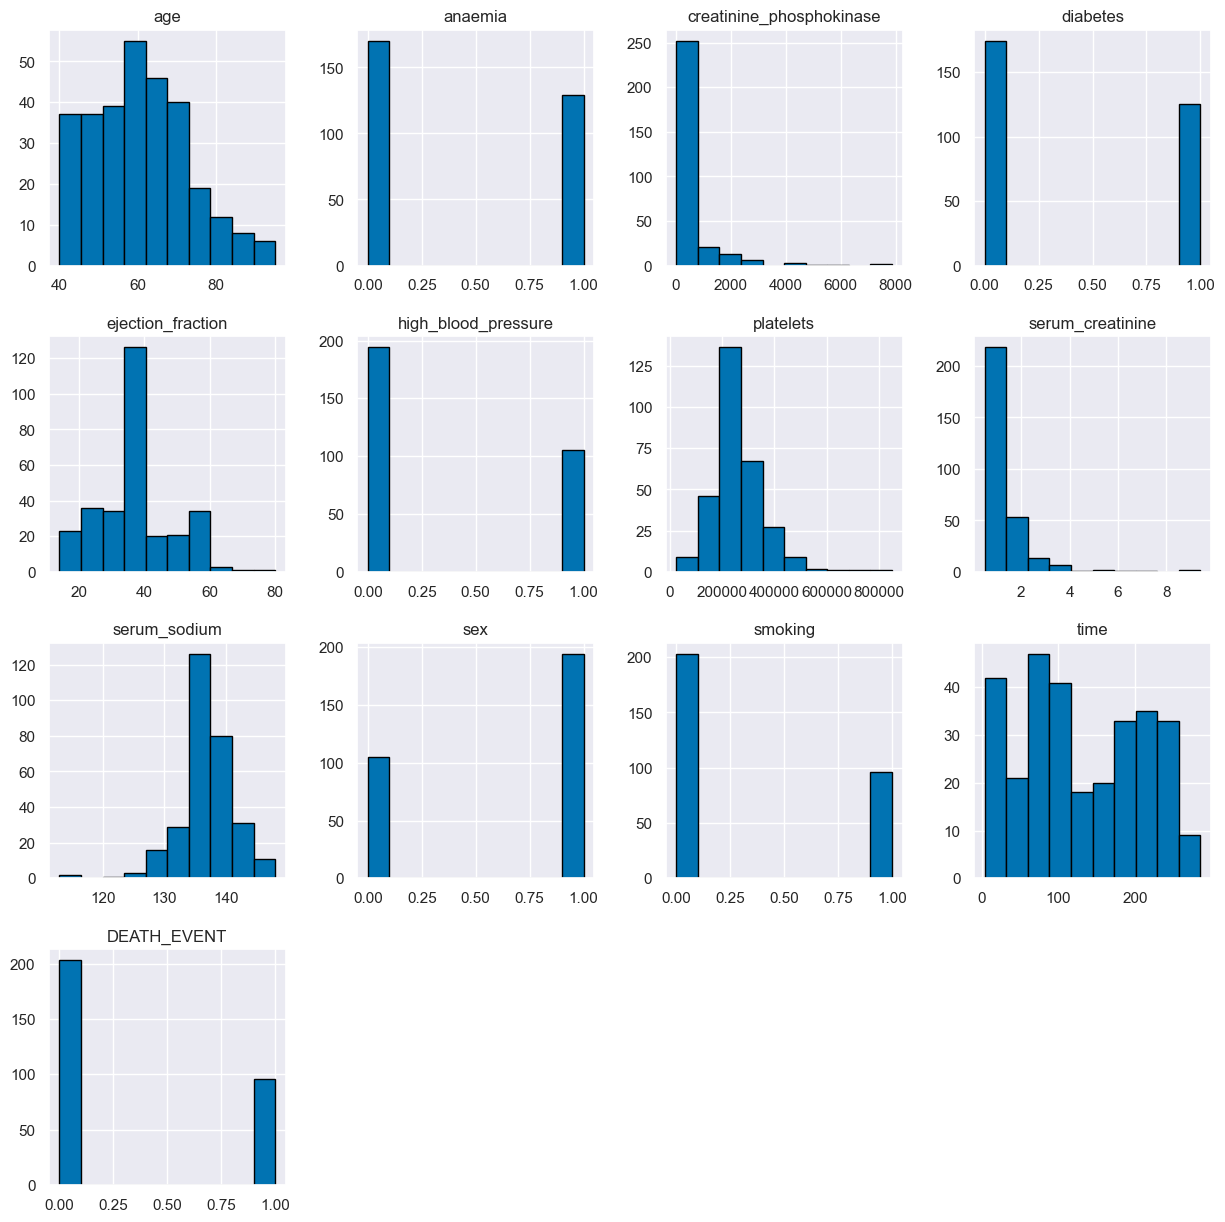

In [133]:
train.hist(figsize=(15,15),edgecolor='black');

### death events

Text(0.5, 1.0, 'the % of deaths')

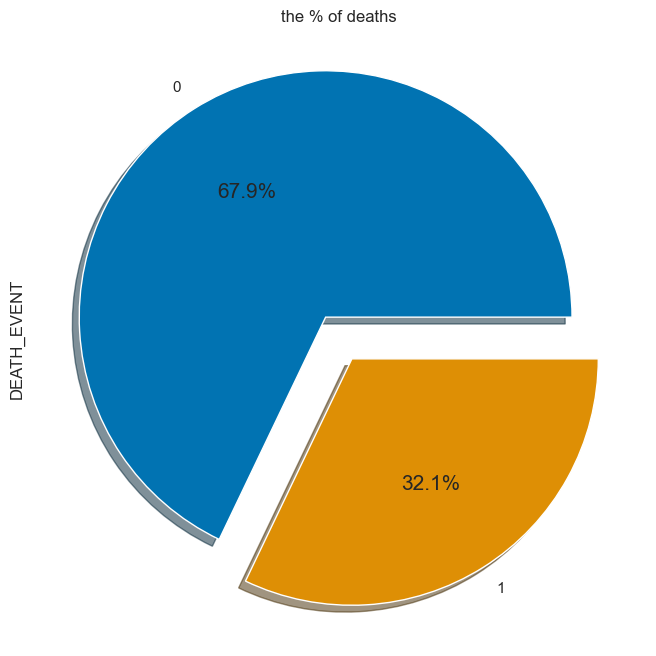

In [134]:
train.DEATH_EVENT.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('the % of deaths')

### Age

Text(0.5, 1.0, 'the ages of our persone')

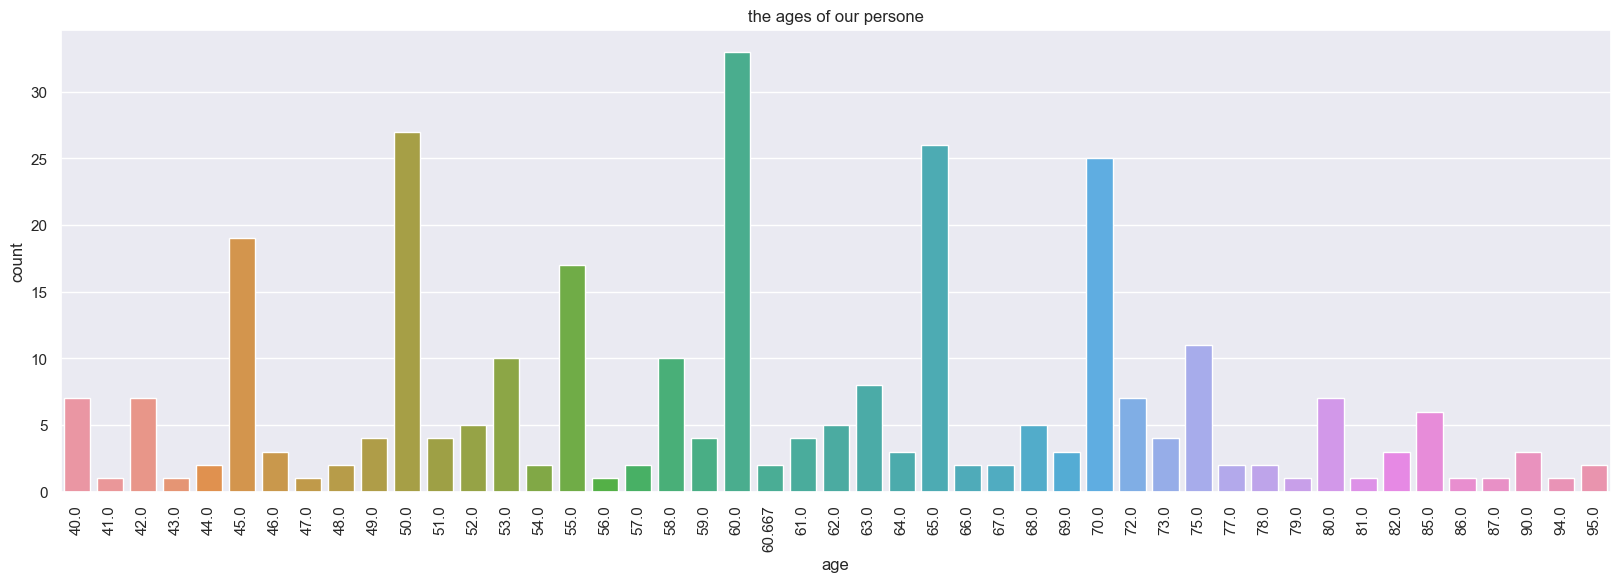

In [135]:
plt.figure(figsize=(20,6))
sns.countplot(x='age',data=train)
plt.xticks(rotation=90)
plt.title('the ages of our persone')

In [136]:
# Distribution of Age


fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='Distribution of Age',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'presentation'
)

fig.show()

In [137]:
# Distribution of AGE Vs DEATH_EVENT

fig = px.histogram(train, x="age", color="DEATH_EVENT", marginal="violin", hover_data=train.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly",
                   
                   
                  )
fig.show()

### sex

<Axes: ylabel='sex'>

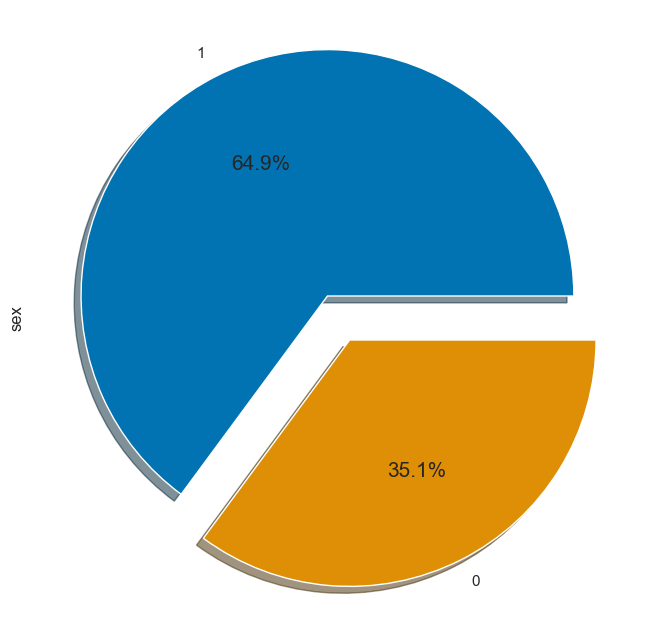

In [138]:
train.sex.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)

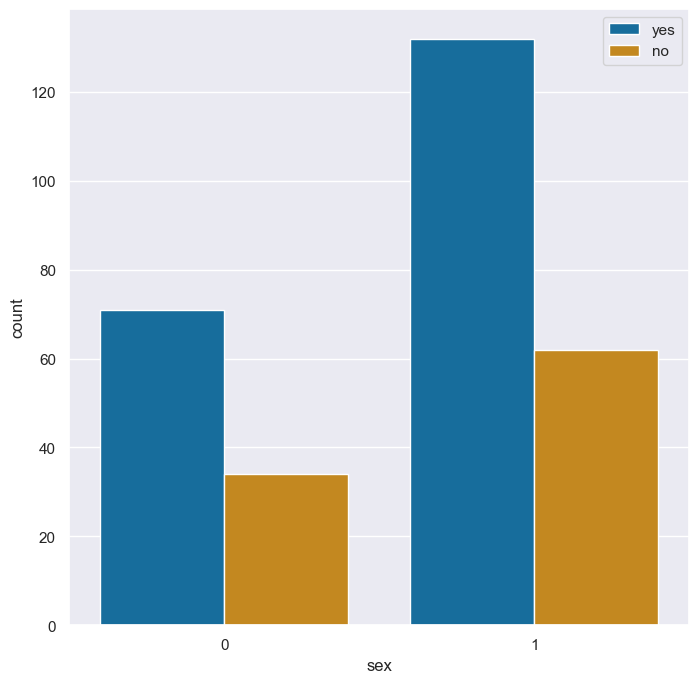

In [139]:
sns.countplot(x='sex',hue='DEATH_EVENT',data=train)
plt.legend(['yes','no'])

In [140]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = train[(train["DEATH_EVENT"]==0) & (train["sex"]==1)]
d2 = train[(train["DEATH_EVENT"]==1) & (train["sex"]==1)]
d3 = train[(train["DEATH_EVENT"]==0) & (train["sex"]==0)]
d4 = train[(train["DEATH_EVENT"]==1) & (train["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]

values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

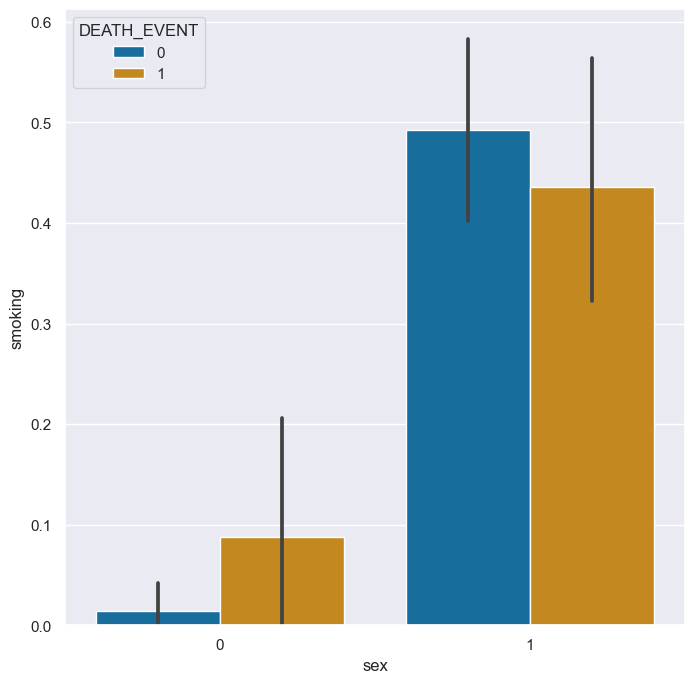

In [141]:
sns.barplot(x='sex',y='smoking',hue='DEATH_EVENT',data=train);

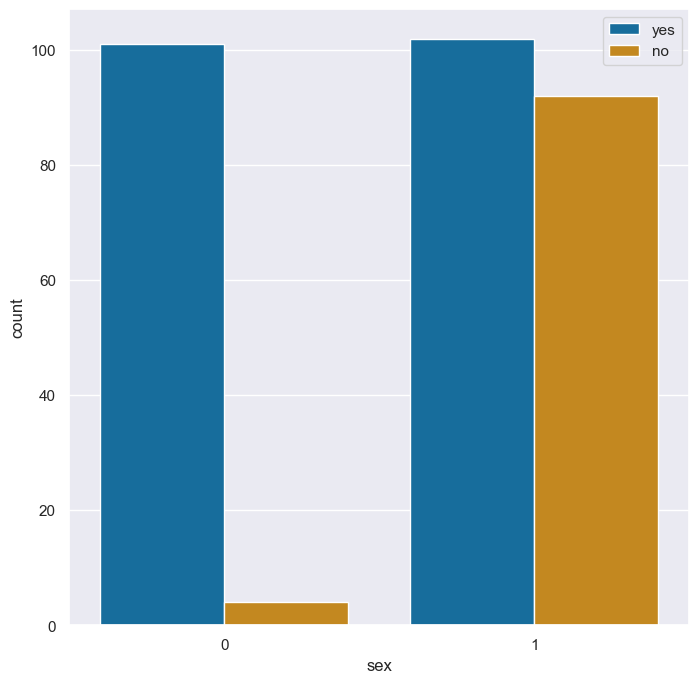

In [142]:
sns.countplot(x='sex',hue='smoking',data=train)
plt.legend(['yes','no']);

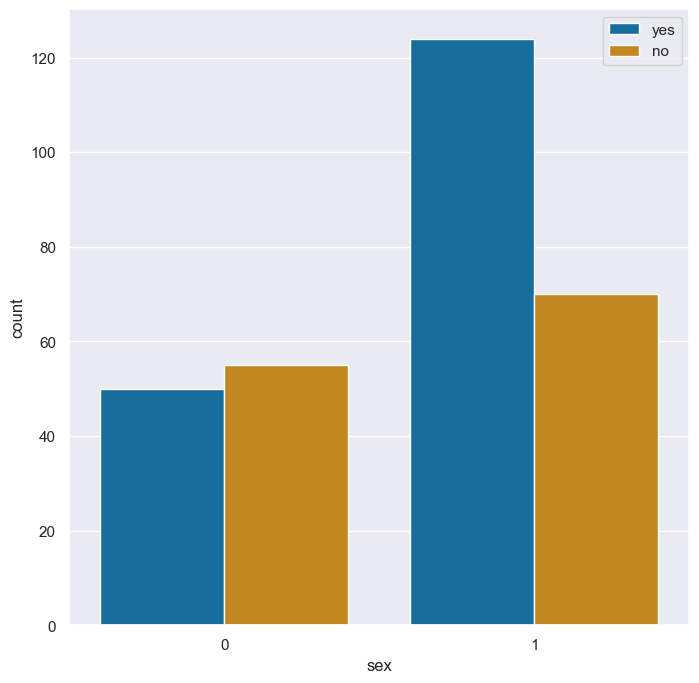

In [143]:
sns.countplot(x='sex',hue='diabetes',data=train)
plt.legend(['yes','no']);

### diabet

<Axes: ylabel='diabetes'>

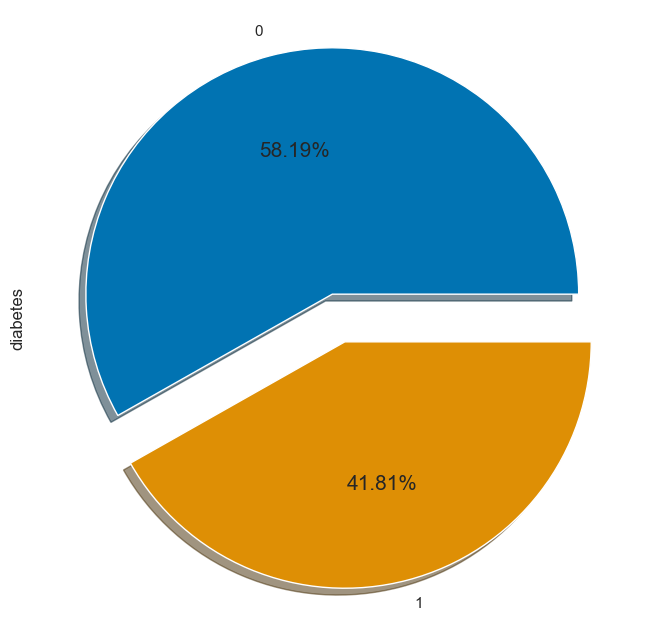

In [144]:
train.diabetes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%2.2f%%',shadow=True)

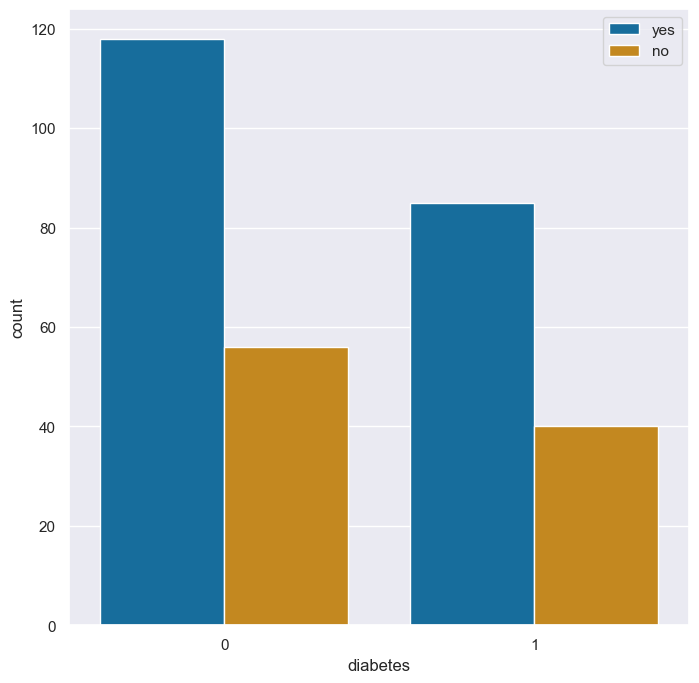

In [145]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=train)
plt.legend(['yes','no']);

### ejection_fraction


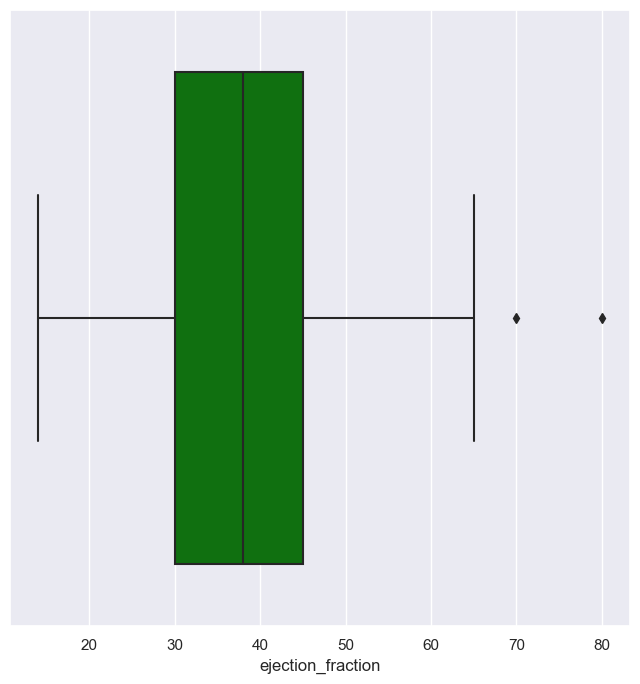

In [146]:
sns.boxplot(x = train.ejection_fraction, color = 'green')
plt.show()

We can see there are two outliers. Lets remove them (70 and 80) 

In [147]:
train[train['ejection_fraction']>=70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [148]:
train = train[train['ejection_fraction']<70]

In [149]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    marker_color='#A7F432',
    opacity=1
))

fig.update_layout(
    title_text='EJECTION FRACTION DISTRIBUTION',
    xaxis_title_text='EJECTION FRACTION',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates

    template = 'plotly_dark'
)

fig.show()

### Time

## features selection 

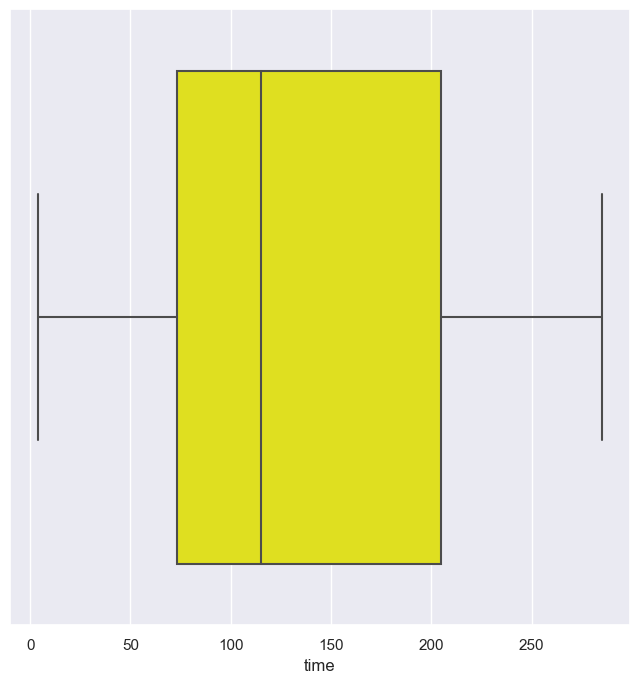

In [150]:
sns.boxplot(x=train.time, color = 'yellow')
plt.show()

No outliers in time 

### ejection_fraction

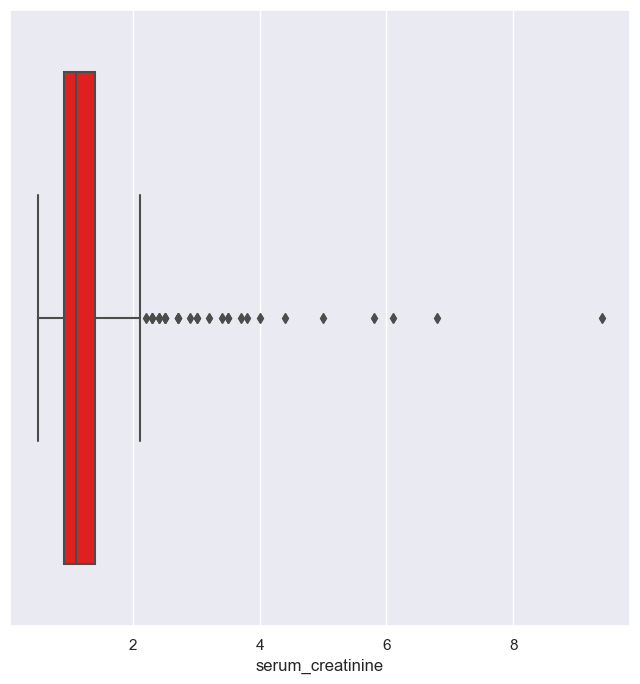

In [151]:
sns.boxplot(x=train.serum_creatinine, color = 'red')
plt.show()

In [152]:
# Before dealing with outliers we require knowledge about the outlier, the dataset and possibly some domain knowledge.

# Removing outliers without a good reason will not always increase accuracy. Without a deep understanding of what are the possible ranges that
# exist within each feature, removing outliers becomes tricky.

# When I researched a bit I found that all the values in serum_creatinine falls in possible range of values. So they are not outliers. 
# They are actual data points that helps in predicting DEATH_EVENT.

## feature selection

In [153]:
train.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/90/q37pw28j70z7sk9bqlkm_xnh0000gn/T/ipykernel_74323/1001306576.py:1: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.00,0.09,-0.08,-0.11,0.08,0.09,-0.05,0.19,-0.05,0.06,0.01,-0.23,0.26
anaemia,0.09,1.00,-0.19,-0.01,0.03,0.03,-0.04,0.03,0.04,-0.09,-0.11,-0.15,0.06
creatinine_phosphokinase,-0.08,-0.19,1.00,-0.01,-0.04,-0.07,0.02,-0.01,0.06,0.08,0.00,-0.01,0.06
diabetes,-0.11,-0.01,-0.01,1.00,0.01,-0.01,0.09,-0.03,-0.09,-0.17,-0.15,0.03,0.00
ejection_fraction,0.08,0.03,-0.04,0.01,1.00,0.02,0.09,-0.09,0.18,-0.12,-0.05,0.05,-0.28
high_blood_pressure,0.09,0.03,-0.07,-0.01,0.02,1.00,0.06,-0.04,0.04,-0.10,-0.05,-0.20,0.07
platelets,-0.05,-0.04,0.02,0.09,0.09,0.06,1.00,-0.01,0.06,-0.13,0.03,0.01,-0.04
serum_creatinine,0.19,0.03,-0.01,-0.03,-0.09,-0.04,-0.01,1.00,-0.21,0.04,-0.01,-0.19,0.29
serum_sodium,-0.05,0.04,0.06,-0.09,0.18,0.04,0.06,-0.21,1.00,-0.03,0.01,0.09,-0.20
sex,0.06,-0.09,0.08,-0.17,-0.12,-0.10,-0.13,0.04,-0.03,1.00,0.44,-0.02,-0.00


[0.09315059 0.02686028 0.07654487 0.03074146 0.13866911 0.02598173
 0.06967312 0.11171122 0.08695857 0.02835274 0.02736314 0.28399318]


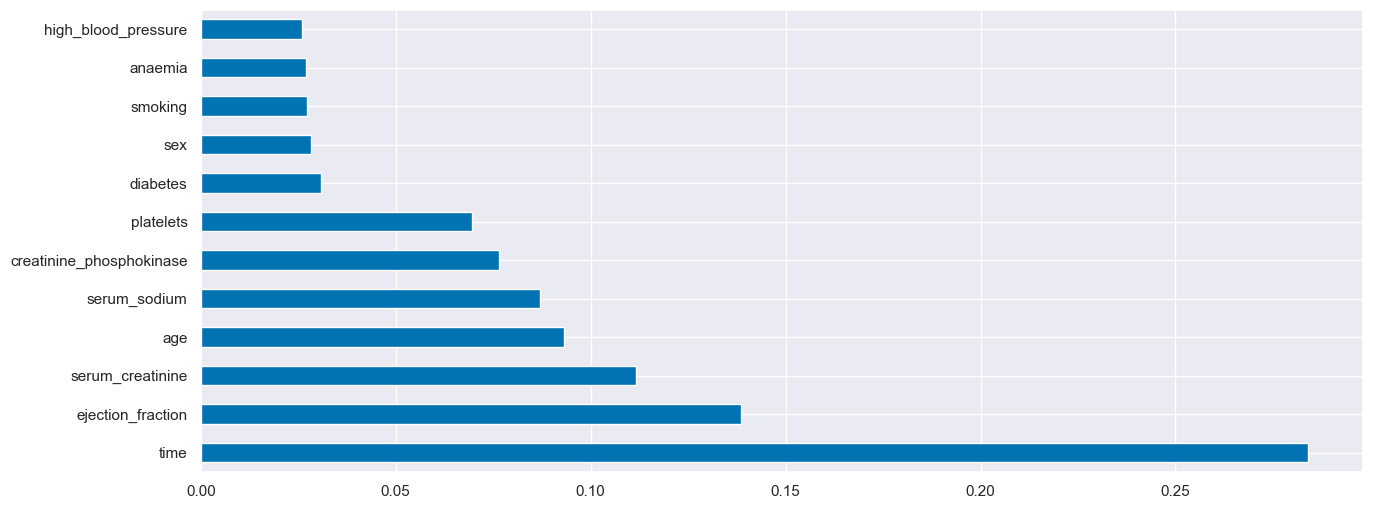

In [154]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = train.iloc[:, :-1]
y = train.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

### like we can c that some of our feature had a corrolation almost aqual to 0 so we gonna drop them like :
* anaemia
* creatinine_phosphokinase
* diabetes
* high_blood_pressure
* platelets
* sex
* smoking


We will select only 3 features : time, ejection_fraction, serum_creatinine 

In [155]:
train=train.drop(['anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','sex','smoking','age'],axis=1)

In [156]:
train

,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,20,1.9,130,4,1
1,38,1.1,136,6,1
2,20,1.3,129,7,1
3,20,1.9,137,7,1
4,20,2.7,116,8,1
...,...,...,...,...,...
294,38,1.1,143,270,0
295,38,1.2,139,271,0
296,60,0.8,138,278,0
297,38,1.4,140,280,0


In [157]:
train.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

/var/folders/90/q37pw28j70z7sk9bqlkm_xnh0000gn/T/ipykernel_74323/1170746184.py:1: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
ejection_fraction,1.000,-0.087,0.180,0.046,-0.285
serum_creatinine,-0.087,1.000,-0.211,-0.189,0.286
serum_sodium,0.180,-0.211,1.000,0.088,-0.196
time,0.046,-0.189,0.088,1.000,-0.537
DEATH_EVENT,-0.285,0.286,-0.196,-0.537,1.000


##  split data

In [158]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [159]:
x=train.drop('DEATH_EVENT',axis=1)
y=train.DEATH_EVENT

In [160]:
print(x.shape)
print(y.shape)

(297, 4)
(297,)


In [161]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [162]:
print(x_train)
print(y_test)

     ejection_fraction  serum_creatinine  serum_sodium  time
22                  35              0.90           140    20
293                 35              0.90           136   270
103                 30              1.00           140    87
246                 25              1.10           138   214
136                 60              0.90           137   107
..                 ...               ...           ...   ...
47                  38              0.60           138    40
264                 38              1.20           141   237
204                 40              0.70           137   187
85                  50              0.70           140    79
122                 38              0.75           140    95

[207 rows x 4 columns]
106    0
260    0
45     1
26     1
221    0
      ..
163    1
184    1
187    1
286    0
263    0
Name: DEATH_EVENT, Length: 90, dtype: int64


## Feature Scaling

In [163]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Logistic Regression

In [164]:
# Making Confusion Matrix and calculating accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

mylist.append(acc_logreg)
print(cm)
print(acc_logreg)

[[57  4]
 [ 9 20]]
0.8555555555555555


## KNN

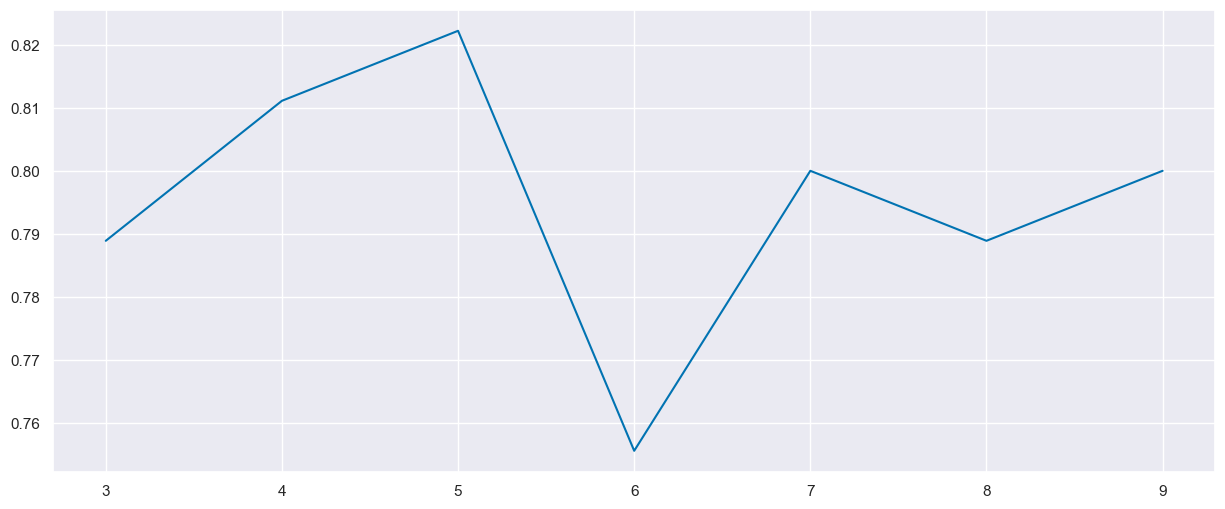

In [165]:
# Finding the optimum number of neighbors 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10)), list1)
plt.show()

In [166]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [167]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0]


In [168]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn)

[[55  6]
 [10 19]]
0.8222222222222222


## Support Vector Machines

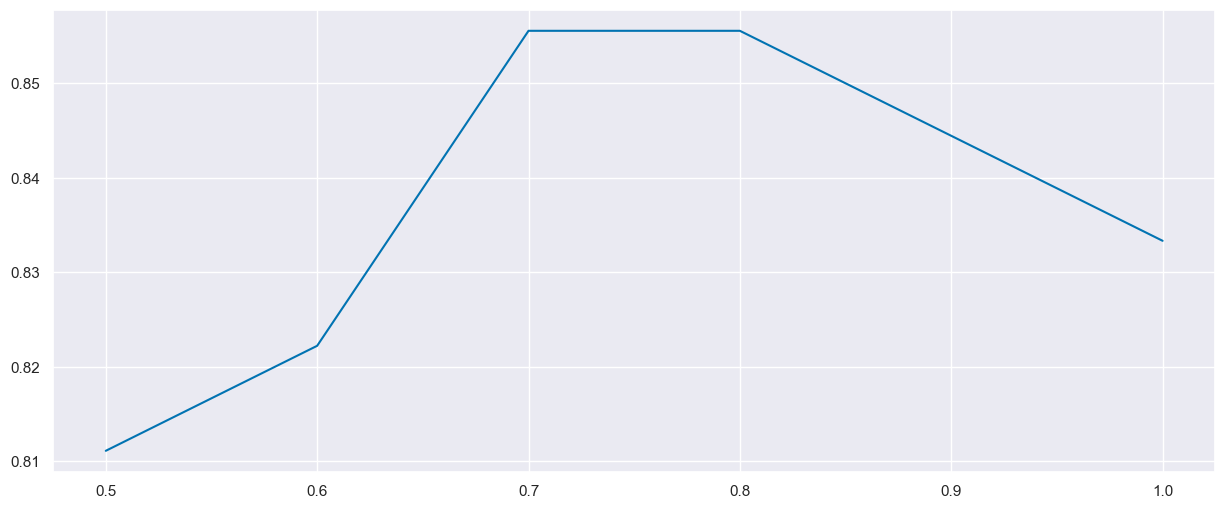

In [169]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [170]:
# Training the Support Vector Classifier on the Training set

from sklearn.svm import SVC
classifier = SVC(C = 0.7, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC(C=0.7, random_state=0)

In [171]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0]


In [172]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_svc = accuracy_score(y_test, y_pred)
print(cm)
print(acc_svc)
mylist.append(acc_svc)

[[56  5]
 [ 8 21]]
0.8555555555555555


## DecisionTreeClassifier

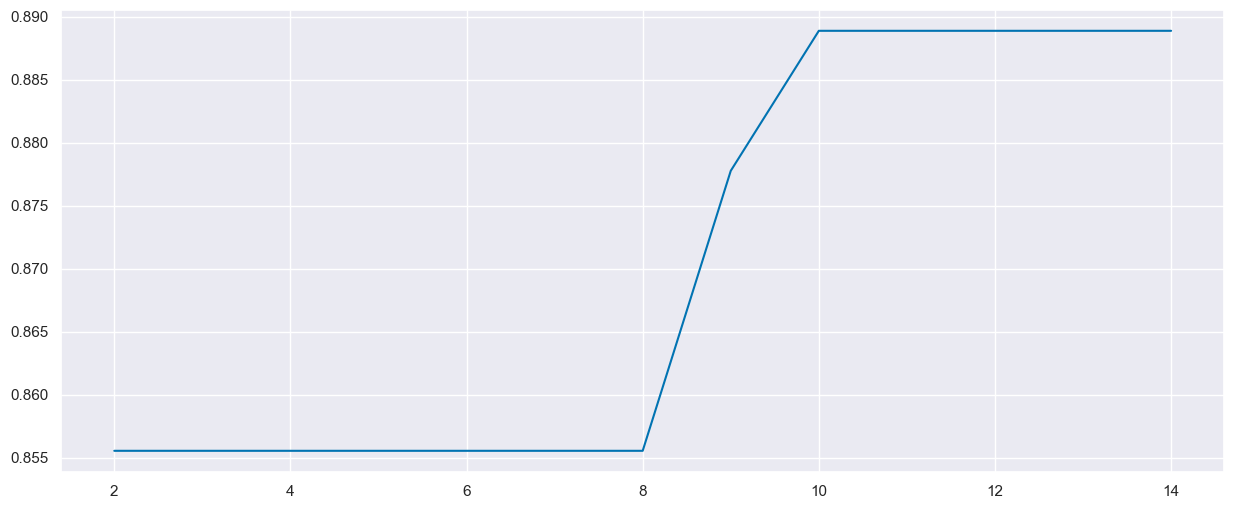

In [173]:
# Finding the optimum number of max_leaf_nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,15)), list1)
plt.show()

In [174]:
# Training the Decision Tree Classifier on the Training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [175]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0]


In [176]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_decisiontree = accuracy_score(y_test, y_pred)
print(cm)
print(acc_decisiontree)
mylist.append(acc_decisiontree)

[[56  5]
 [ 5 24]]
0.8888888888888888


## RANDOM FOREST CLASSIFCATION

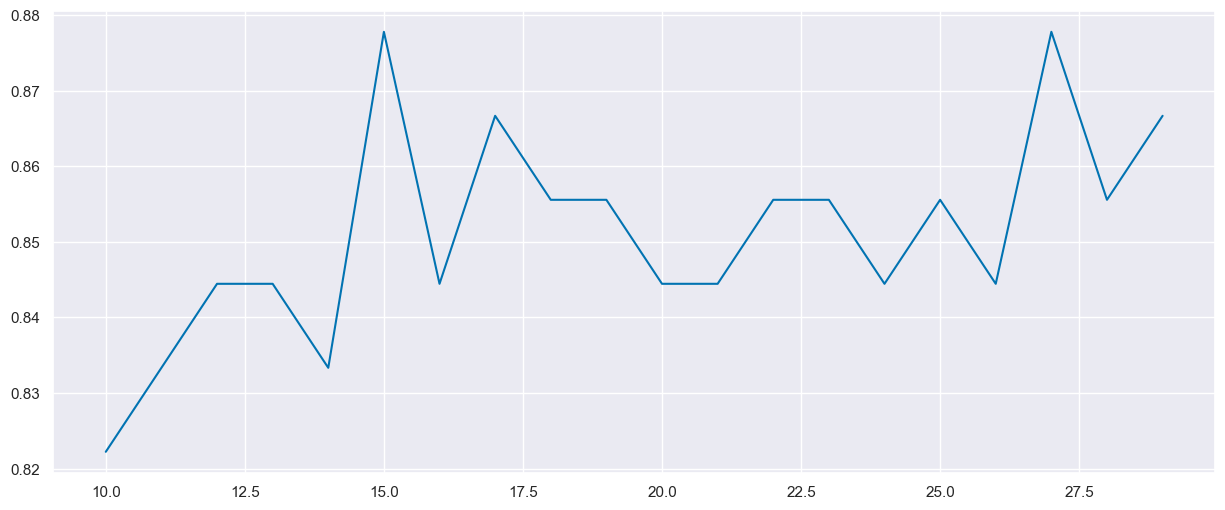

In [177]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [178]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [179]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1
 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0]


In [180]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest)

[[56  5]
 [ 6 23]]
0.8777777777777778


## ANN (neural network )

In [181]:
np.random.seed(0)
import tensorflow as tf

# Initialising the ANN

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )
ann.fit(x_train, y_train, batch_size = 16, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 763us/step - loss: 0.7521 - accuracy: 0.3140
Epoch 2/100
13/13 [==============================] - 0s 609us/step - loss: 0.7121 - accuracy: 0.3575
Epoch 3/100
13/13 [==============================] - 0s 667us/step - loss: 0.6876 - accuracy: 0.5217
Epoch 4/100
13/13 [==============================] - 0s 678us/step - loss: 0.6727 - accuracy: 0.7053
Epoch 5/100
13/13 [==============================] - 0s 638us/step - loss: 0.6611 - accuracy: 0.7295
Epoch 6/100
13/13 [==============================] - 0s 609us/step - loss: 0.6486 - accuracy: 0.7343
Epoch 7/100
13/13 [==============================] - 0s 624us/step - loss: 0.6376 - accuracy: 0.7488
Epoch 8/100
13/13 [==============================] - 0s 543us/step - loss: 0.6273 - accuracy: 0.7585
Epoch 9/100
13/13 [==============================] - 0s 519us/step - loss: 0.6164 - accuracy: 0.7585
Epoch 10/100
13/13 [==============================] - 0s 526us/step - loss: 0.6055 - accura

In [182]:
# Predicting the test set results

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()


3/3 [==============================] - 0s 875us/step


In [183]:
# Making the confusion matrix, calculating accuracy_score 

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac_ann = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_ann)
mylist.append(ac_ann)

Confusion Matrix
[[55  6]
 [ 9 20]]

Accuracy
0.8333333333333334


## xgboost 

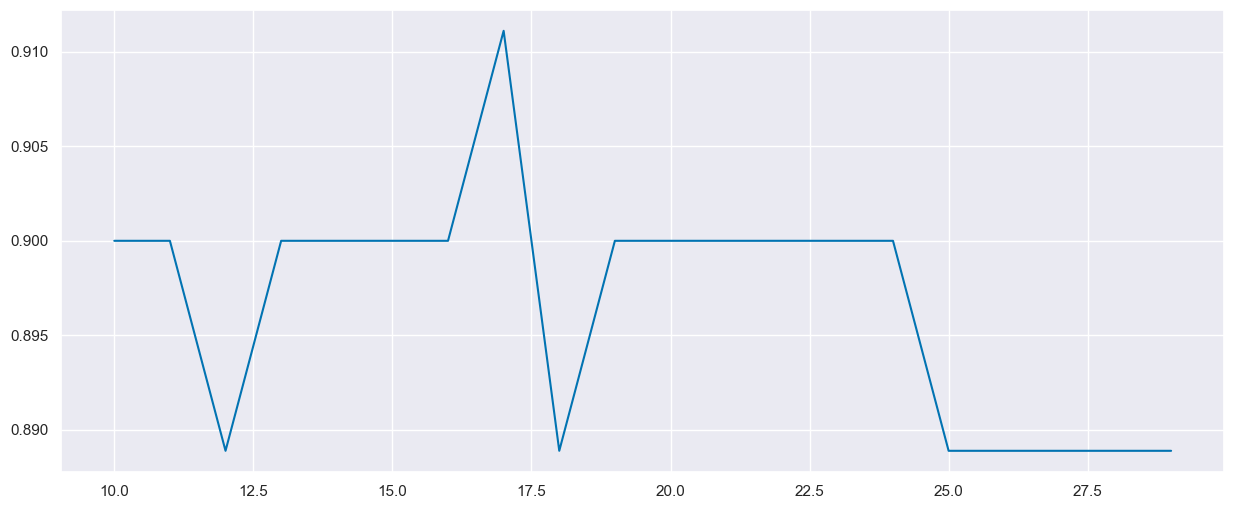

In [184]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30,1)), list1)
plt.show()

In [185]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [186]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0]


In [187]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac_xgboost = accuracy_score(y_test, y_pred)
mylist.append(ac_xgboost)
print(cm)
print(ac_xgboost)

[[58  3]
 [ 6 23]]
0.9


## catboost

In [188]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(x_train, y_train)

Learning rate set to 0.005258
0:	learn: 0.6888764	total: 57.1ms	remaining: 57.1s
1:	learn: 0.6845328	total: 57.9ms	remaining: 28.9s
2:	learn: 0.6814418	total: 58.5ms	remaining: 19.5s
3:	learn: 0.6772356	total: 59.3ms	remaining: 14.8s
4:	learn: 0.6731541	total: 60ms	remaining: 11.9s
5:	learn: 0.6694993	total: 60.7ms	remaining: 10.1s
6:	learn: 0.6660375	total: 61.3ms	remaining: 8.69s
7:	learn: 0.6619023	total: 61.9ms	remaining: 7.68s
8:	learn: 0.6580525	total: 62.6ms	remaining: 6.9s
9:	learn: 0.6543968	total: 63.3ms	remaining: 6.26s
10:	learn: 0.6510915	total: 63.8ms	remaining: 5.74s
11:	learn: 0.6476753	total: 64.4ms	remaining: 5.3s
12:	learn: 0.6442001	total: 65.1ms	remaining: 4.94s
13:	learn: 0.6400425	total: 65.7ms	remaining: 4.63s
14:	learn: 0.6364592	total: 66.2ms	remaining: 4.35s
15:	learn: 0.6322074	total: 66.7ms	remaining: 4.1s
16:	learn: 0.6282728	total: 67.3ms	remaining: 3.89s
17:	learn: 0.6237837	total: 67.8ms	remaining: 3.7s
18:	learn: 0.6203034	total: 68.3ms	remaining: 3.52

In [189]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0]


In [190]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac_catboost = accuracy_score(y_test, y_pred)
mylist.append(ac_catboost)
print(cm)
print(ac_catboost)

[[58  3]
 [ 9 20]]
0.8666666666666667


In [191]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'ANN',   
              'Decision Tree','xgboost','catboost'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, ac_ann, acc_decisiontree,ac_xgboost,ac_catboost
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,xgboost,0.900000
5,Decision Tree,0.888889
3,Random Forest,0.877778
7,catboost,0.866667
0,Support Vector Machines,0.855556
2,Logistic Regression,0.855556
4,ANN,0.833333
1,KNN,0.822222


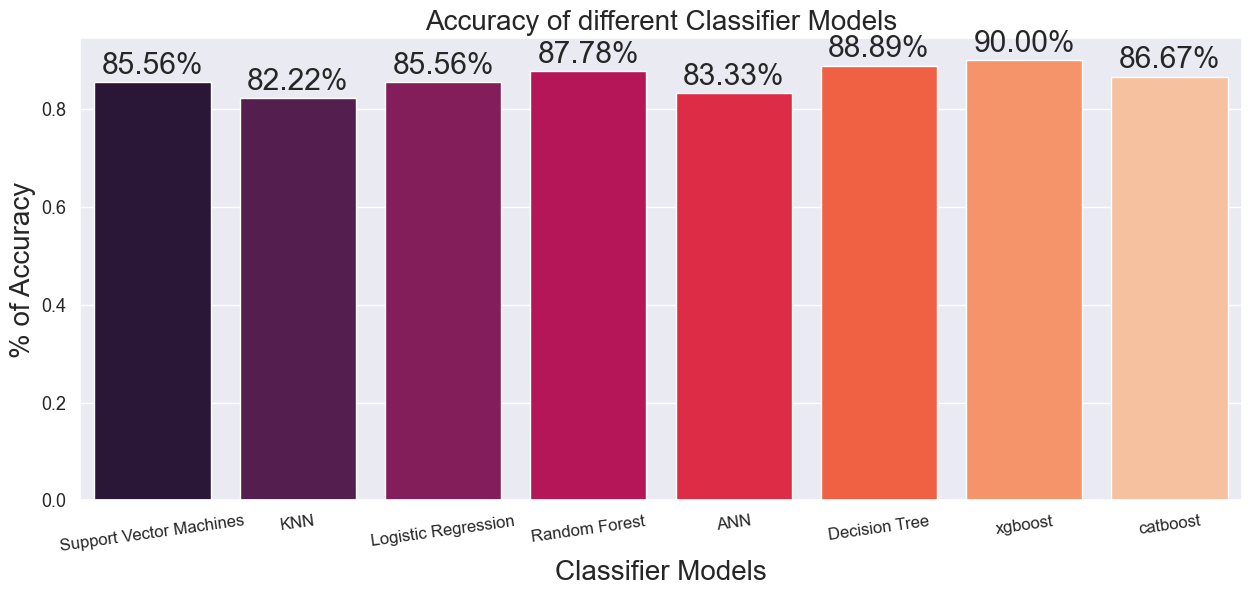

In [192]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()